In [36]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from matplotlib.pyplot import figure
from matplotlib import patches

import nilearn
from nilearn.datasets import fetch_spm_auditory
from nilearn import image
from nilearn import masking
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
import pandas as pd

from os.path import join as opj
from nibabel.testing import data_path
import json
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast, Normalize12
#tpm_img ='/home/ubuntu/Documents/MATLAB/spm12/tpm/TPM.nii' # normalization template

from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces.utility import Function, IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype import Workflow, Node
#from bids.layout import BIDSLayout
from nipype.algorithms.misc import Gunzip

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import nibabel as nib
from nilearn import datasets

from dipy.io.image import load_nifti

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from dipy.io.image import load_nifti

import nibabel as nib
from nibabel import Nifti1Image




In [68]:
def Conn (data_folder,subject_code,events_,fildd):
    
    for i in  subject_code:
        subject_folder='/sub-xp'
        String_contrinuation1='/func/sub-xp'
        String_contrinuation2=fildd
        subject_codee=str(i)
    
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        

        fmri_img, affine, img = load_nifti(subject_data , return_img=True);
        
        fmri_rest=[]
        fmri_rest_todos=[]
        
        if fildd=='_task-motorloc_bold.nii.gz':
            r1=range(1,161,20)
            r2=range(11,171,20)
        
        else: 
            r1=range(1,201,20)
            r2=range(11,211,20)
            

        
        for rest in r1:

            fmri_rest=fmri_img[:,:,:,rest:rest+10]

            if rest==1:
                fmri_rest_todos=fmri_rest


            else:
                fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)
        
        fmri_task=[]
        fmri_task_todos=[]

        for task in r2:

            fmri_task=fmri_img[:,:,:,task:task+10]

            if task==11:
                fmri_task_todos=fmri_task


            else:
                fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
        

        fmri_rest_todos=nib.Nifti1Image(fmri_rest_todos,affine);  
        fmri_task_todos=nib.Nifti1Image(fmri_task_todos,affine);  

        mean_img_rest = image.mean_img(fmri_rest_todos);

        mean_img_task = image.mean_img(fmri_task_todos);


        
        dataset = datasets.fetch_atlas_msdl(); # importamos atlas 
        atlas_filename = dataset.maps;
        labels = dataset.labels;


        masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                                 memory='nilearn_cache', verbose=5);

        # Matriz conectividad rest
        time_series = masker.fit_transform(fmri_rest_todos); #####!!!
        correlation_measure = ConnectivityMeasure(kind='correlation');
        correlation_matrix = correlation_measure.fit_transform([time_series])[0];
        np.fill_diagonal(correlation_matrix, 0);
        
        #fig = plt.figure(figsize=(10,10));
        #plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                             #vmax=0.9, vmin=-0.9,axes=fig.gca()); 
        
        

         # Matriz conectividad task
        time_series_task = masker.fit_transform(fmri_task_todos); #####!!  
        correlation_measure_task = ConnectivityMeasure(kind='correlation');
        correlation_matrix_task = correlation_measure.fit_transform([time_series_task])[0];
        np.fill_diagonal(correlation_matrix_task, 0);
        #fig = plt.figure(figsize=(10,10));
        #plotting.plot_matrix(correlation_matrix_task, labels=labels, colorbar=True,
                         #    vmax=0.9, vmin=-0.9,axes=fig.gca()); 
        
        
        # Cerebros rest
        
        coords = dataset.region_coords
       # plotting.plot_connectome(correlation_matrix, coords,
                        # edge_threshold="99%", colorbar=True)

        #plotting.show()
        
        # Cerebros task
        
        coords = dataset.region_coords
        #plotting.plot_connectome(correlation_matrix_task, coords,
                         #edge_threshold="99%", colorbar=True)

       # plotting.show()

        #PLOTS
        
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

        ax[1, 0].plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                             vmax=0.9, vmin=-0.9,axes=fig.gca()); 
        ax[1, 0].set_title('Rest XXXXX', fontsize=15)
        ax[1, 1].plot_matrix(correlation_matrix_task, labels=labels, colorbar=True,
                             vmax=0.9, vmin=-0.9,axes=fig.gca());
        title1='XXX'+subject_codee
        ax[1].set_title(title1, fontsize=15)
        ax[2].plt.plot_connectome(correlation_matrix, coords, edge_threshold="99%", colorbar=True)
        ax[2].set_title('XXXX', fontsize=15);
        
        ax[3].plt.plot_connectome(correlation_matrix_task, coords,edge_threshold="99%", colorbar=True)

        ax[3].set_title('XXXX', fontsize=15);

        
        

# EEG & fMRI

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
[Memory]1.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
[Memory]2.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


AttributeError: 'numpy.ndarray' object has no attribute 'plt'

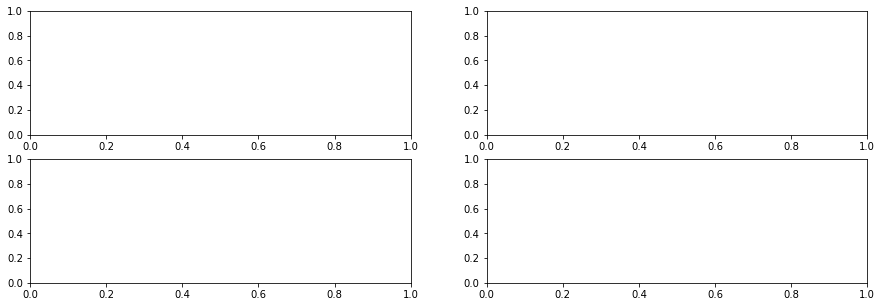

In [69]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-eegfmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

# fMRI

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8515960490>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8517ad7eb0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_sin

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.4s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f851f68b190>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84fa63fee0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.6s, 0.1min


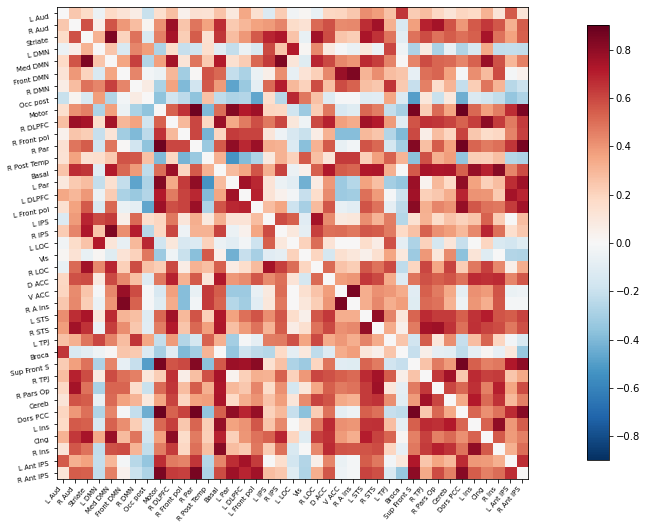

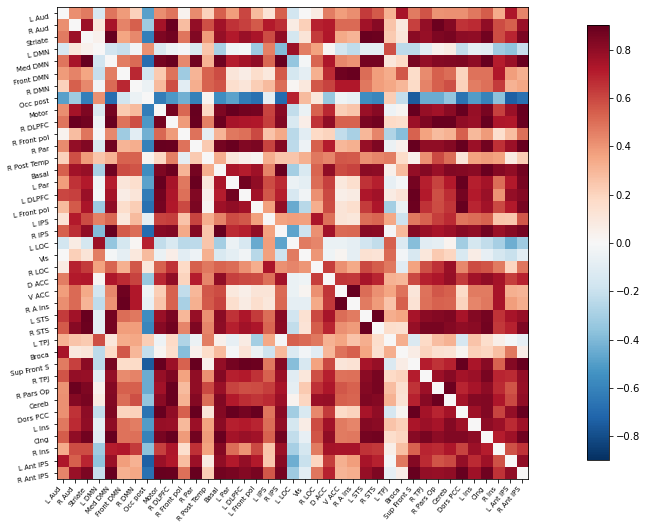

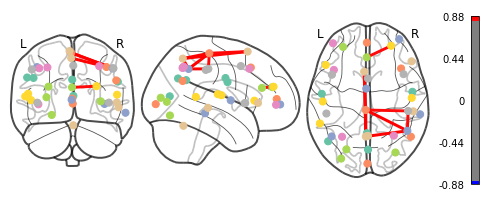

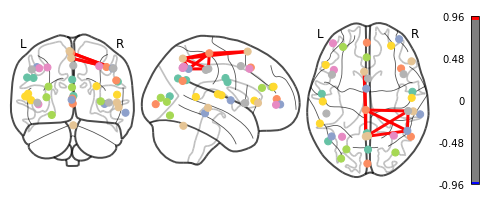

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8533c8e640>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f851f041b20>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8450a58df0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f851f68b190>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.0s, 0.1min


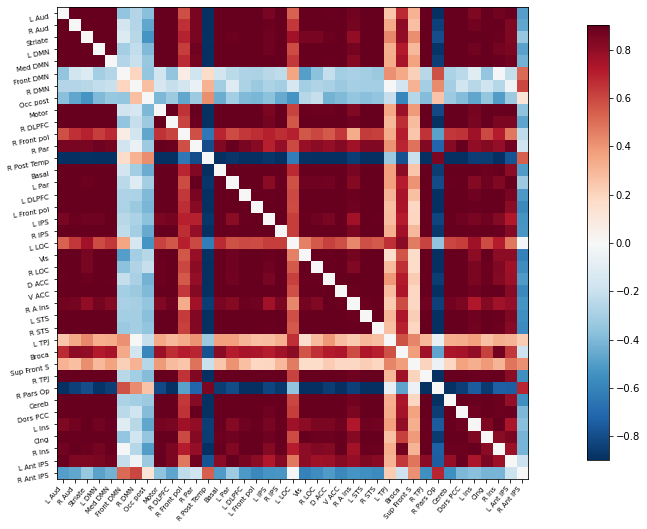

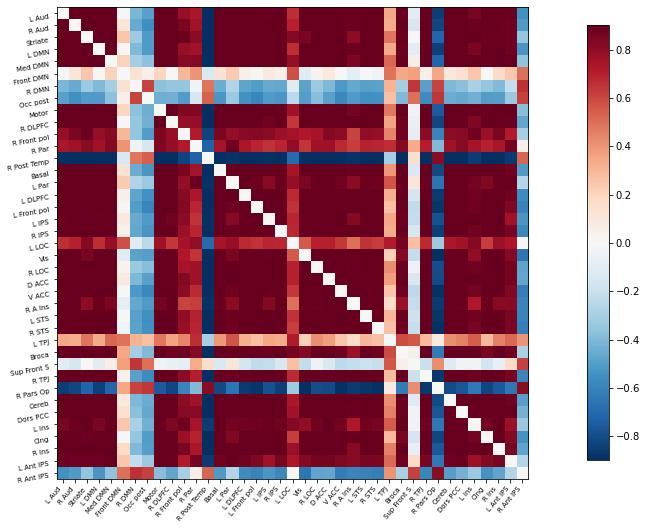

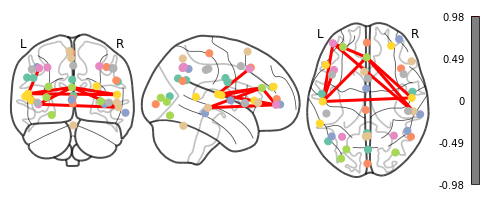

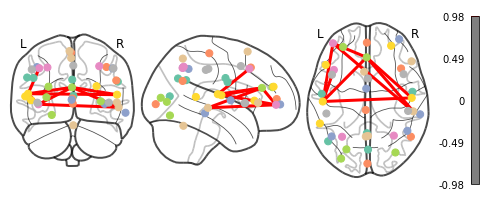

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8450b81e20>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f85457653a0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.6s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84509f3c40>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84fa1be6a0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.8s, 0.1min


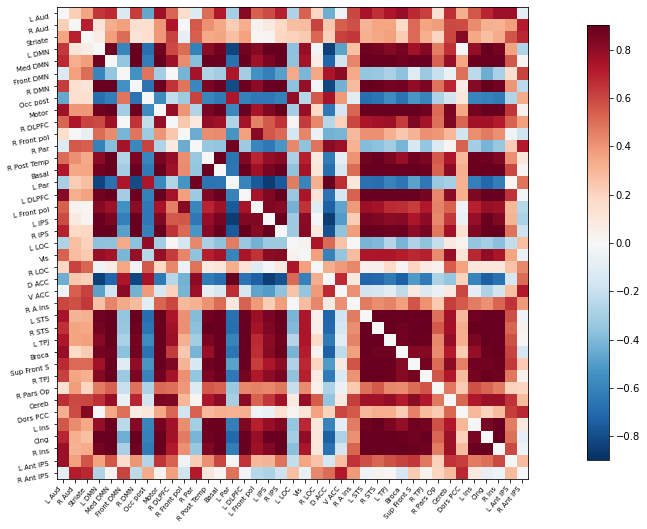

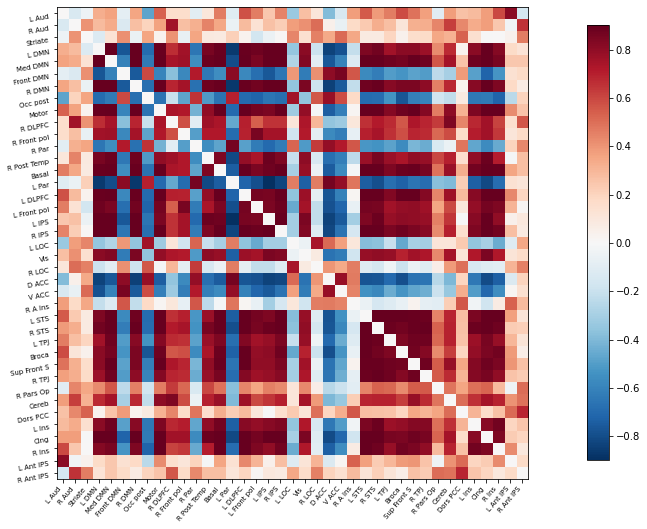

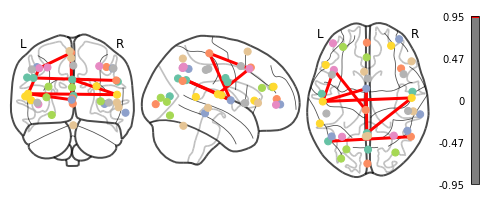

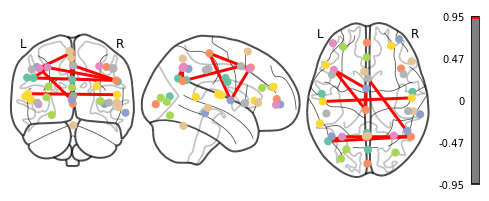

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8533a17730>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8450b81e20>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_sin

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8451165610>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f85457118b0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.9s, 0.1min


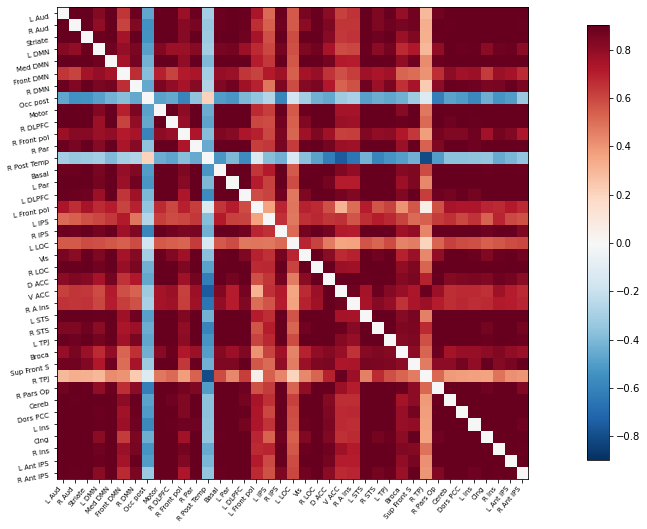

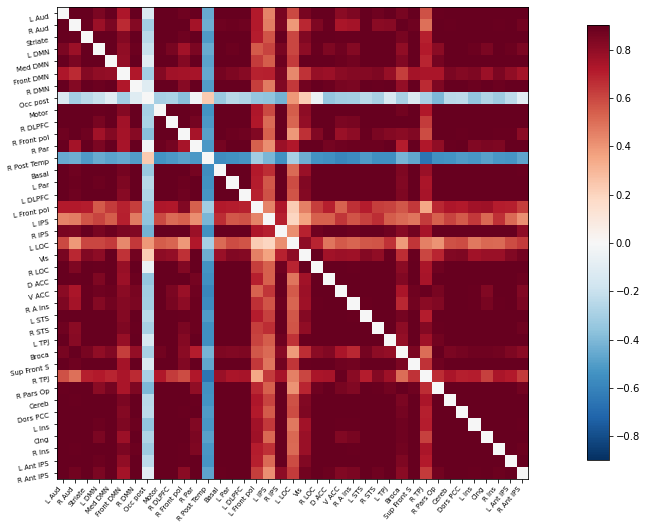

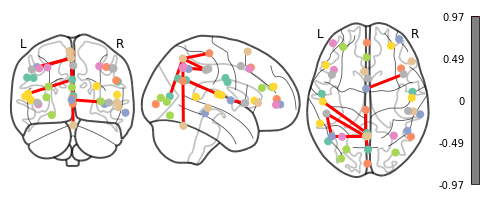

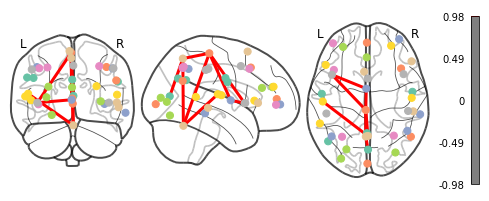

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8533ccfc40>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f851634ff10>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.5s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8451197a90>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8450a1f0a0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.4s, 0.1min


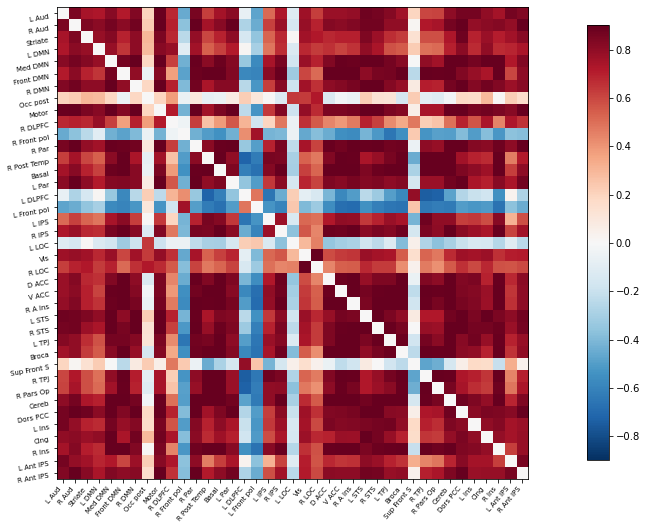

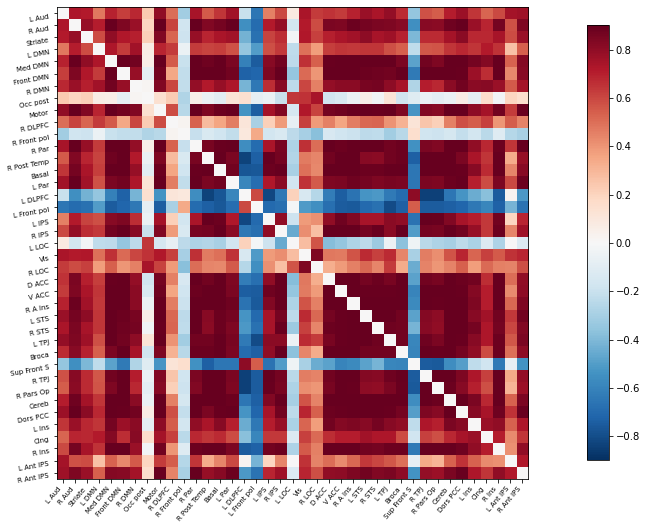

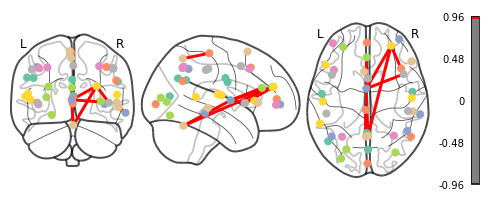

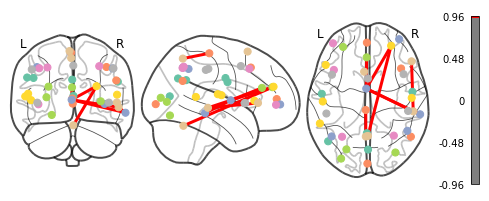

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84519a8550>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84500870a0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(106, 106, 32, 100),
affine=array([[-1.98028278e+00,  5.18555120e-02, -5.24673648e-0

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.5s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8451741d90>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84517d4b50>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.6s, 0.1min


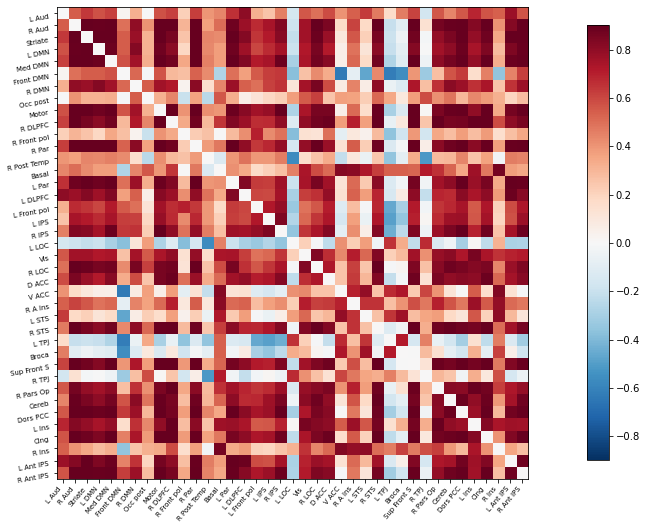

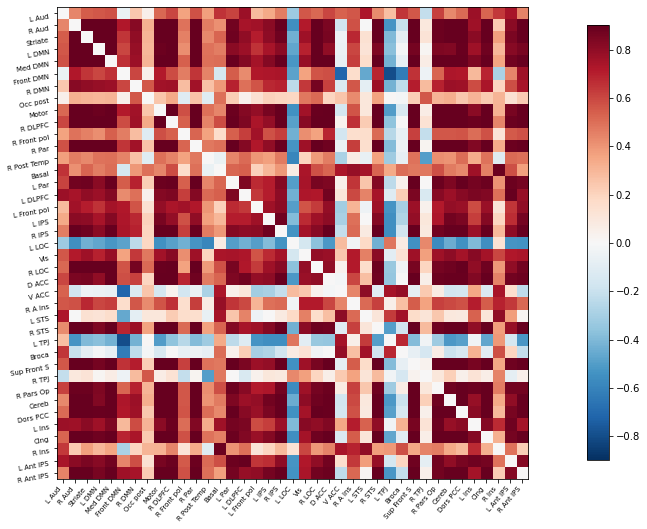

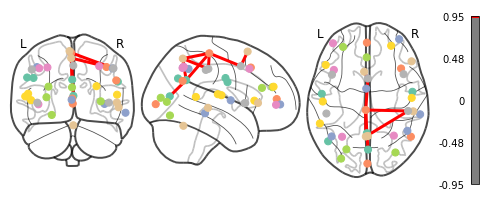

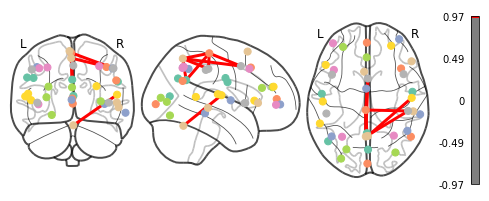

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84511ed5e0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8450424ca0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f853433cca0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f845052dd30>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.5s, 0.1min


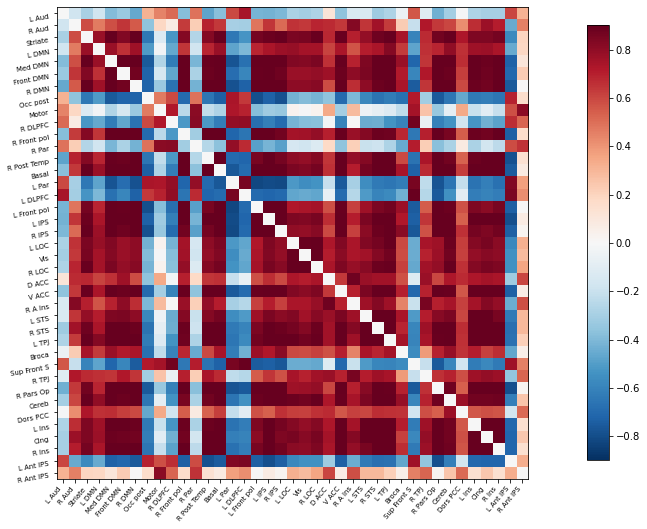

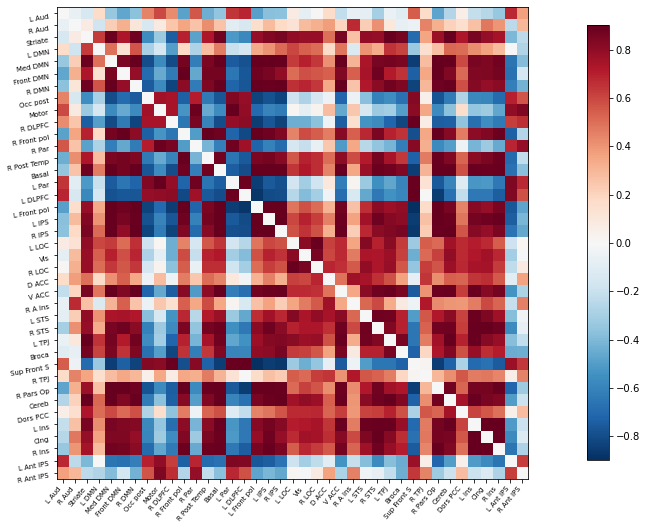

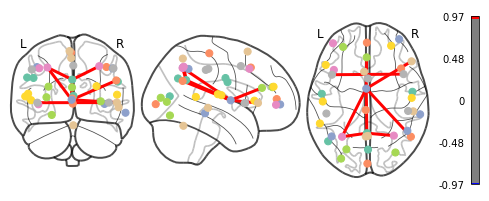

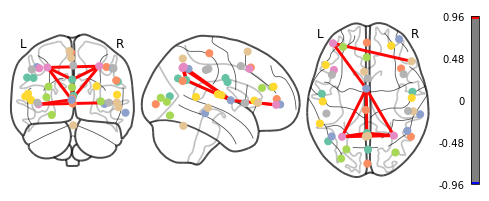

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534070f40>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8450087070>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534ab7d00>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8450087910>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min


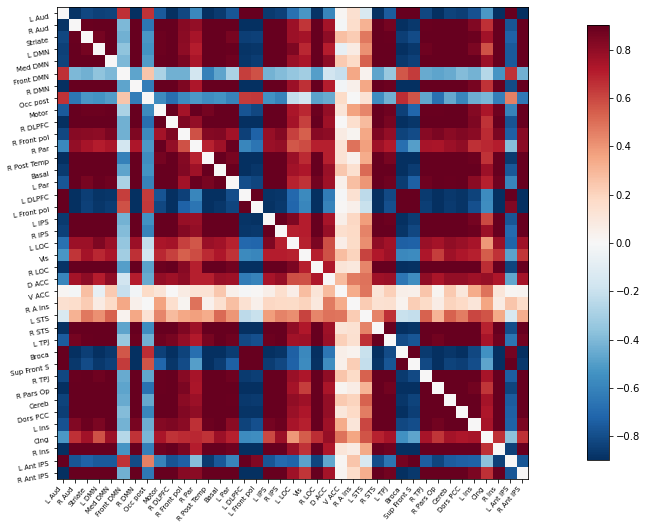

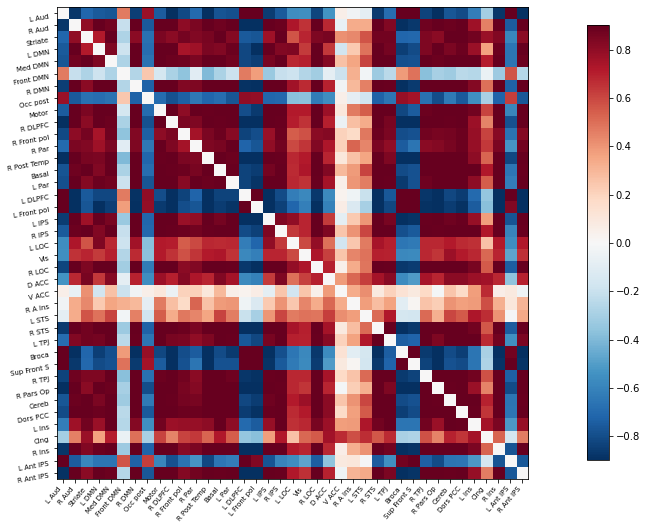

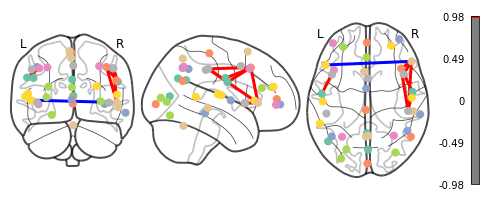

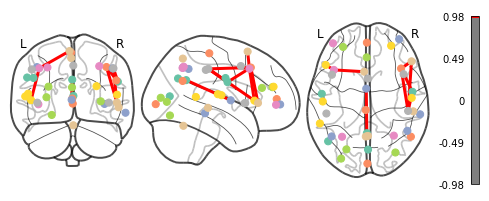

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534eb2340>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84511ed5e0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.5s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534fad7c0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8451977fa0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.9s, 0.1min


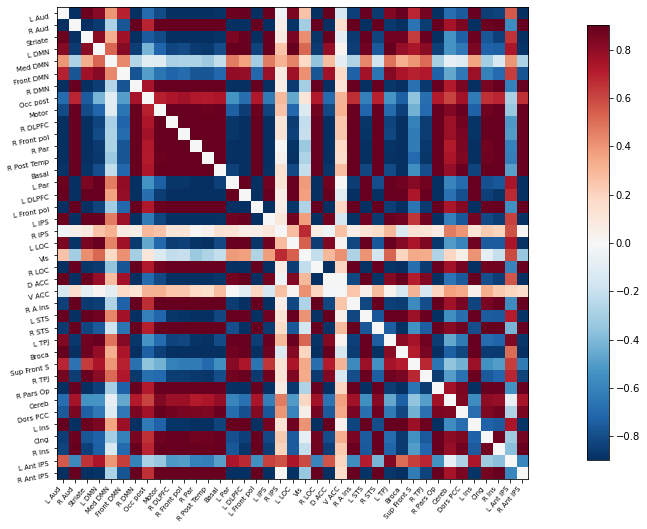

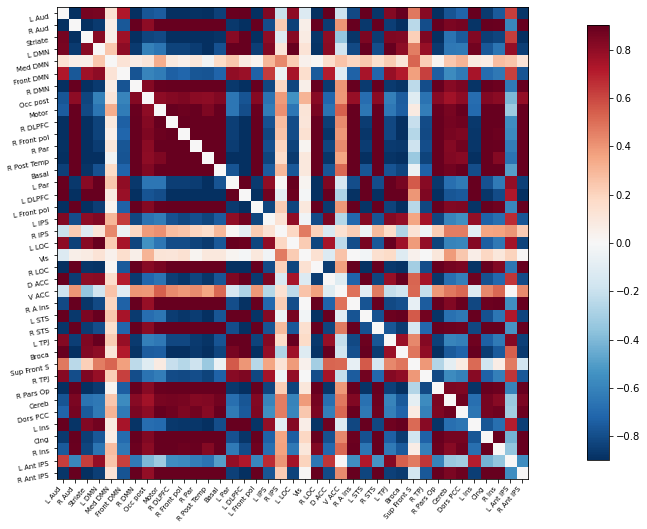

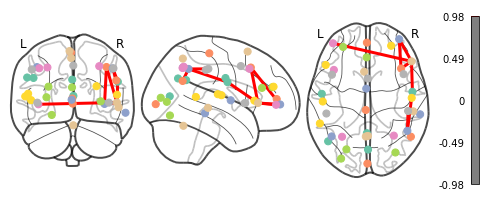

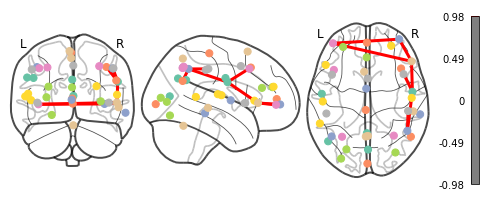

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534fb0c10>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84500d72e0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.6s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8451c722b0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8451085970>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.1s, 0.1min


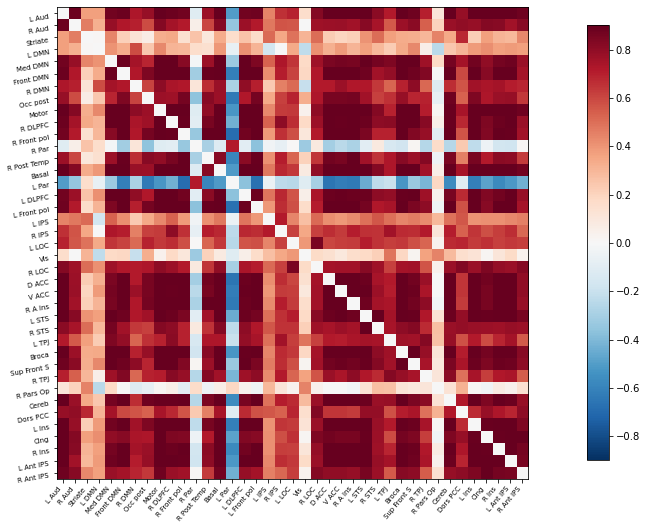

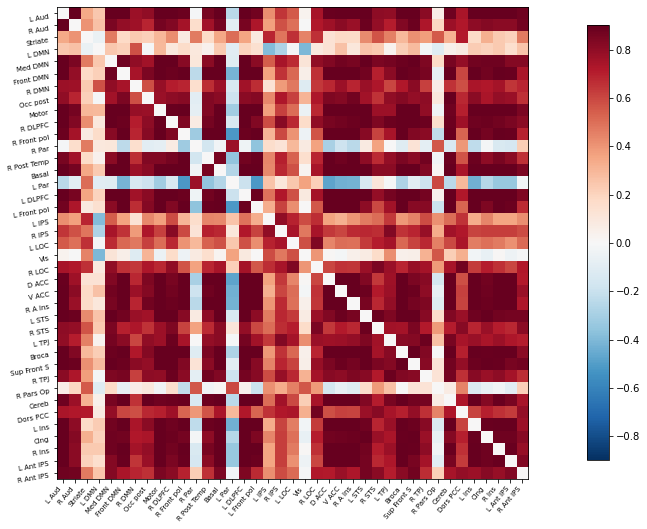

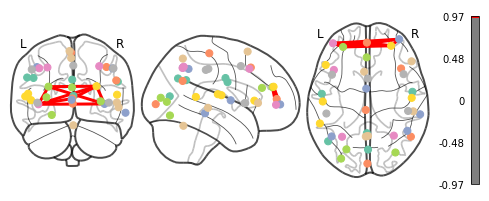

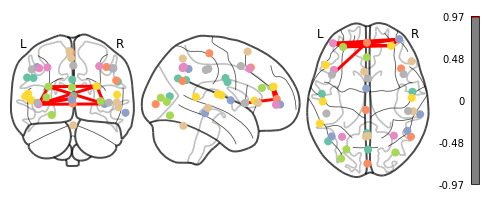

In [55]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-fmriNF_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

# EEG

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534d2e190>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8534bf9490>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.8s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8533915af0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f845199f460>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.9s, 0.1min


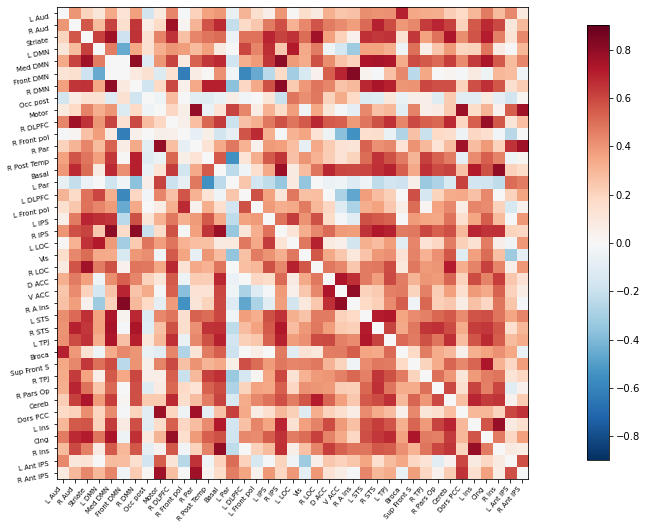

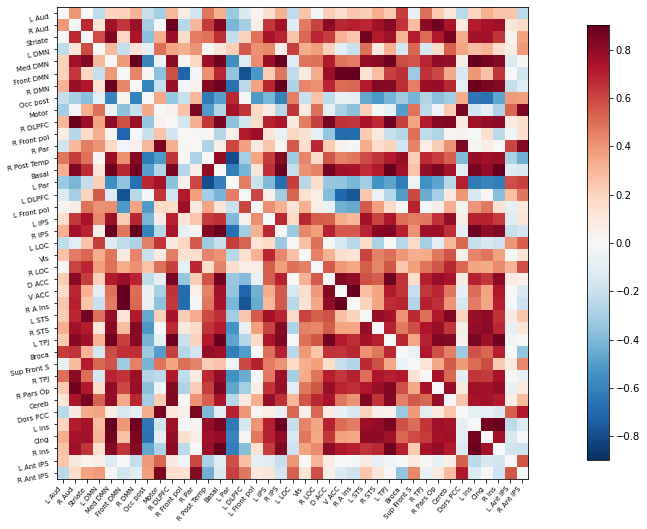

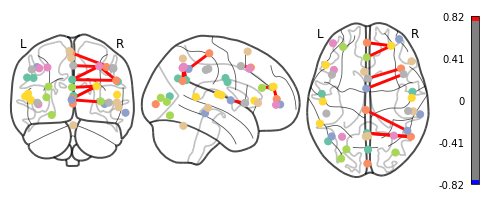

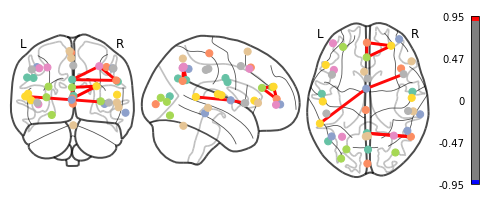

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8534f50760>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8534fbe250>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 5.1s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84528478e0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84519b9190>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.7s, 0.1min


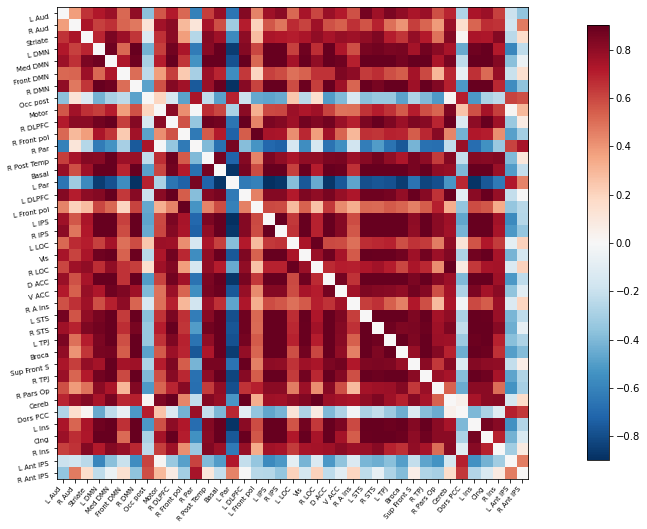

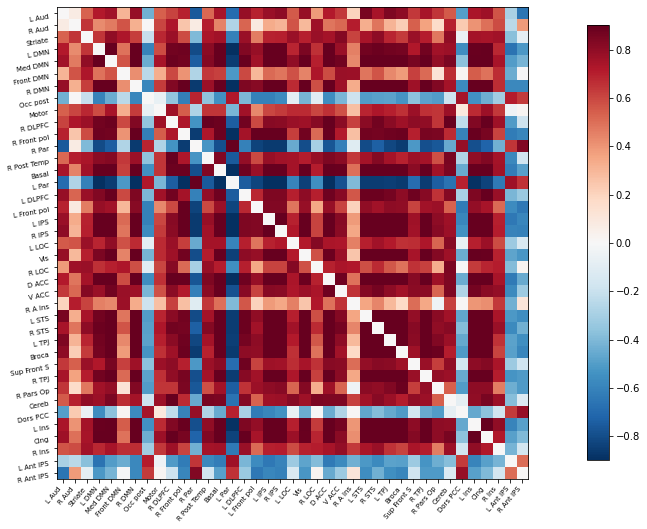

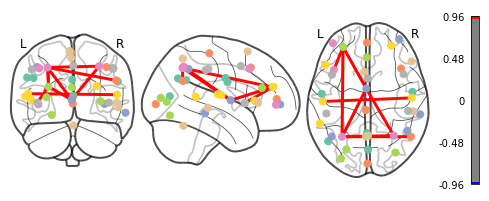

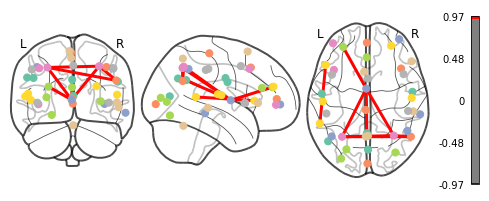

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8514a947f0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8544bbacd0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.0s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8517fd5070>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8515960550>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min


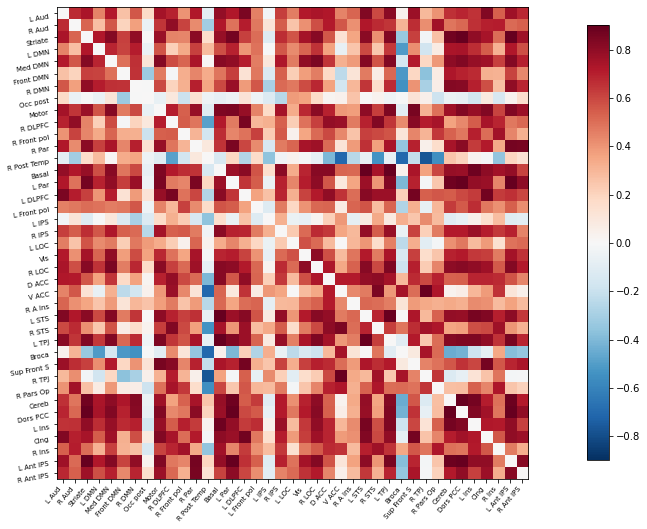

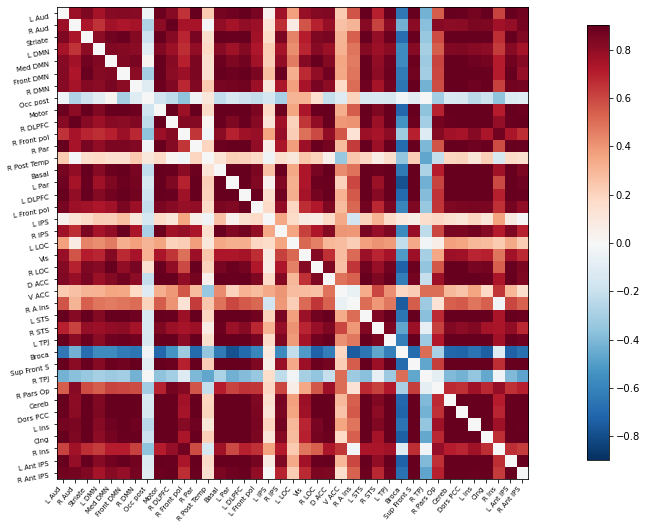

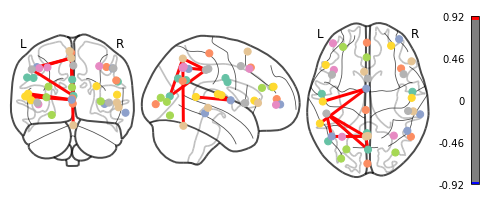

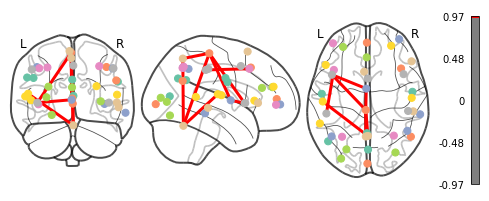

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8520aa9e80>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8514a947f0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_sin

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f845311b850>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8517fe9280>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.0s, 0.1min


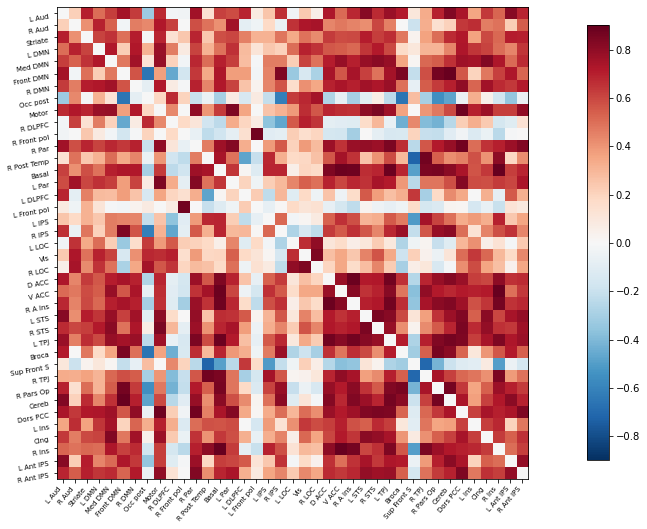

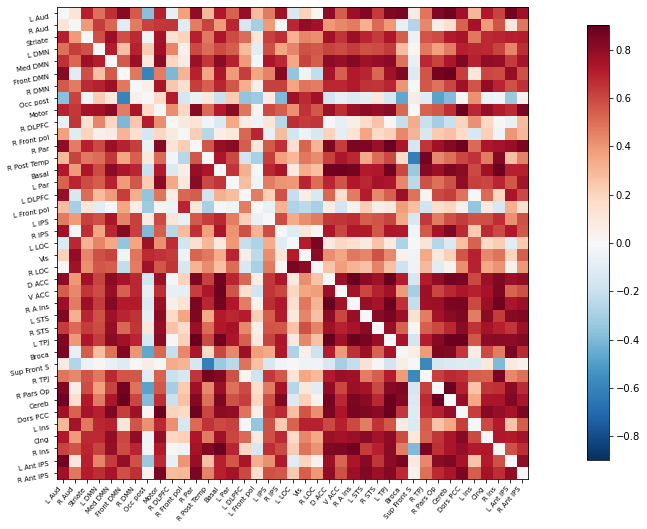

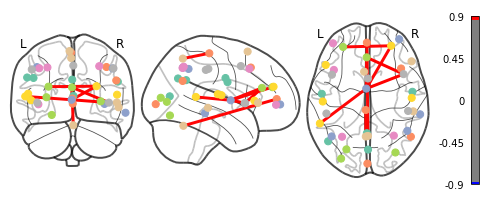

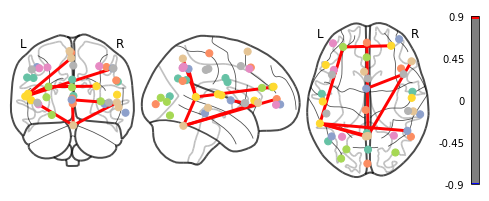

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8452610670>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84525855b0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


______________________________________________filter_and_extract - 11.3s, 0.2min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8452b921c0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84526b4c10>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.8s, 0.1min


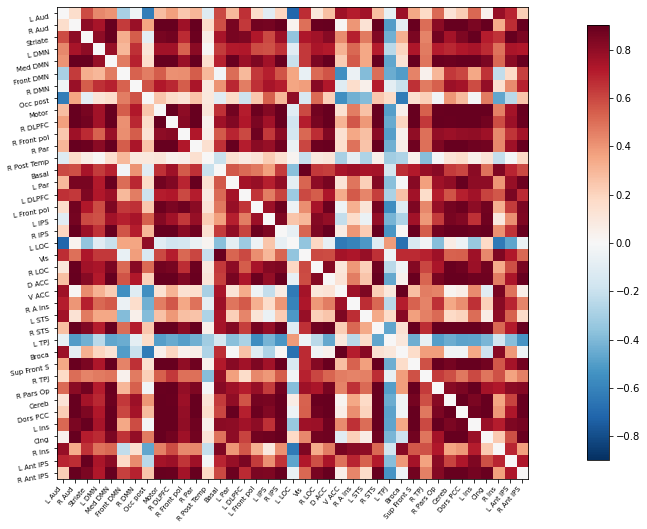

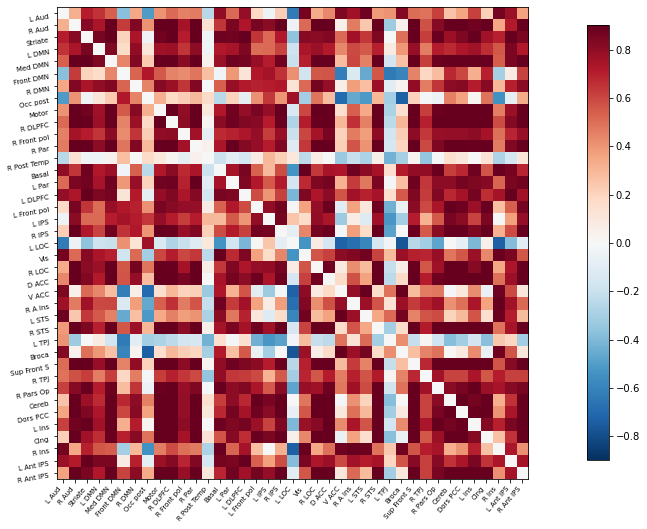

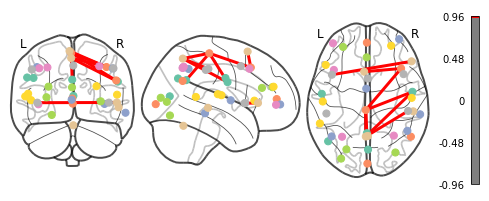

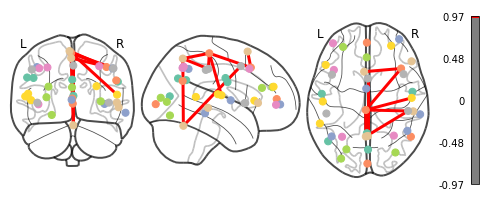

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f8534f88e80>, interpolation='continuous', target_shape=(106, 106, 32), target_affine=array([[-1.980195e+00,  4.839489e-02, -7.475245e-02,  1.033161e+02],
       [ 5.463002e-02,  1.943224e+00, -7.708907e-01, -1.160660e+02],
       [-2.698841e-02,  3.826493e-01,  3.924301e+00, -5.418033e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]))


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________resample_img - 7.2s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8453161be0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8517117a30>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.1s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8535ad5700>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f8452b781f0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 7.4s, 0.1min


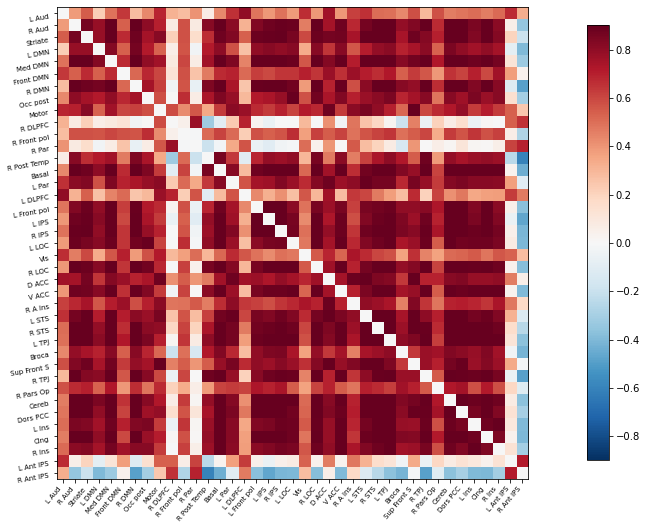

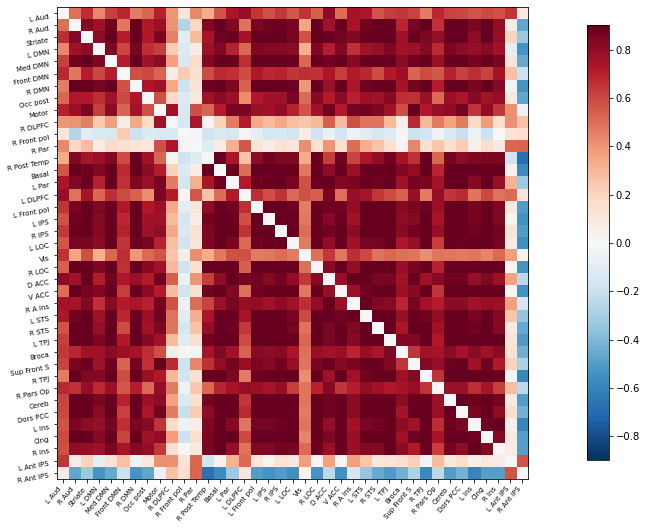

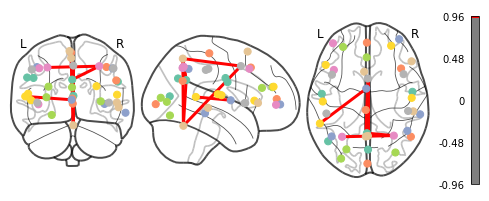

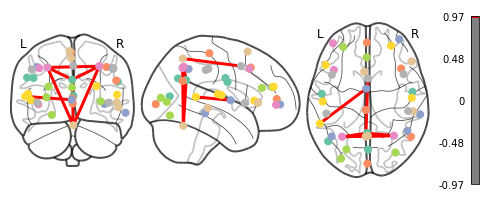

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84531eeee0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84528f4bb0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 5.7s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8520b5a460>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84526b4c10>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 5.8s, 0.1min


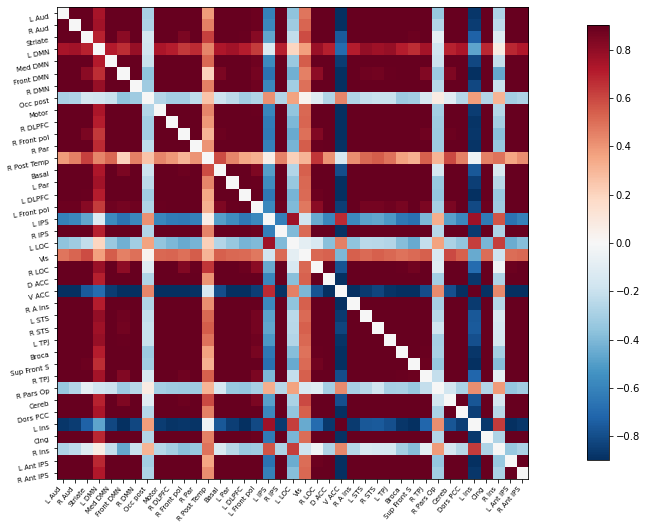

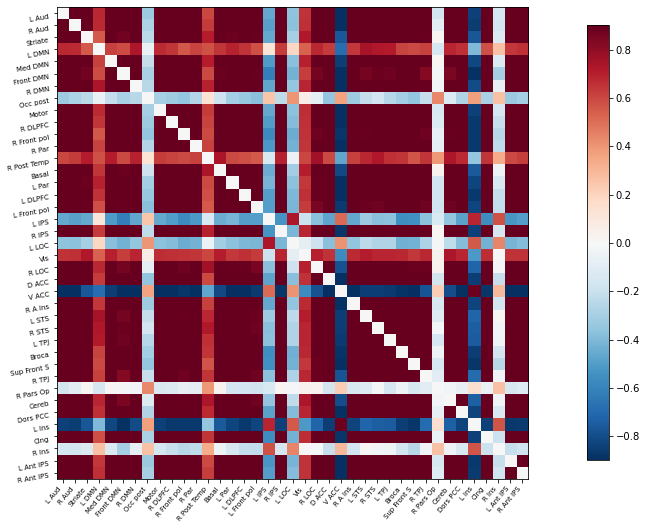

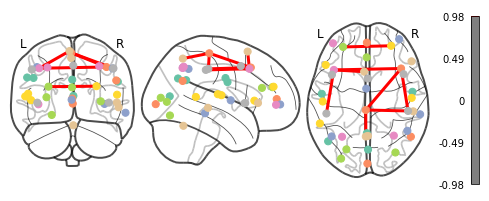

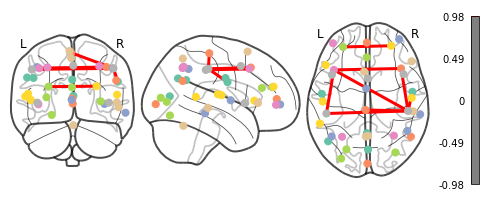

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84c86a3b80>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f85353632e0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_sin

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 4.0s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f8452b3c580>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84532067c0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.8s, 0.1min


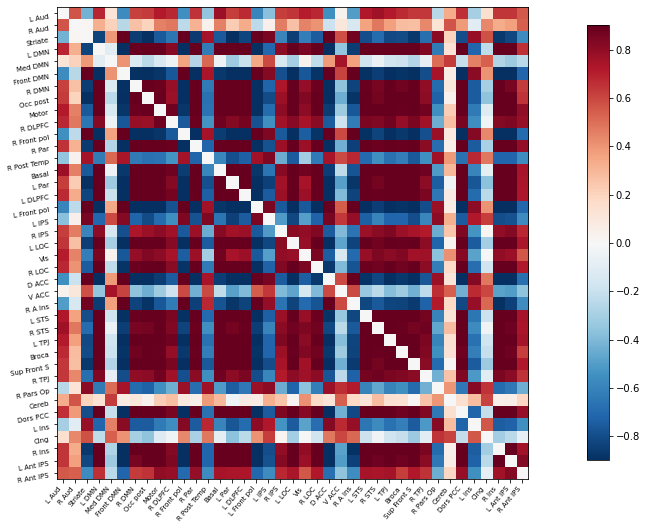

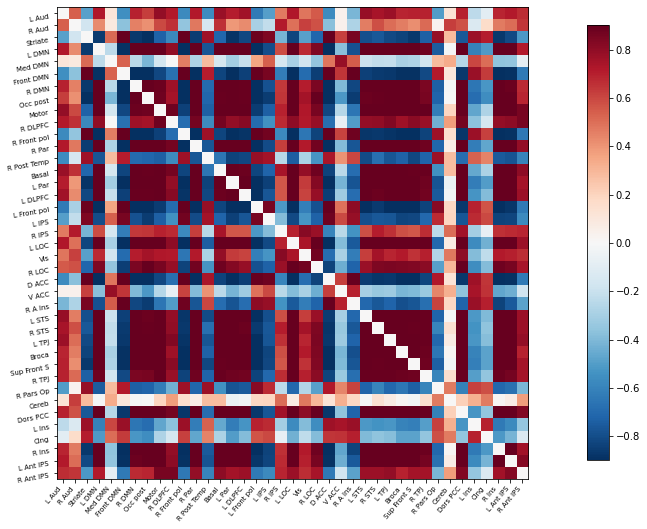

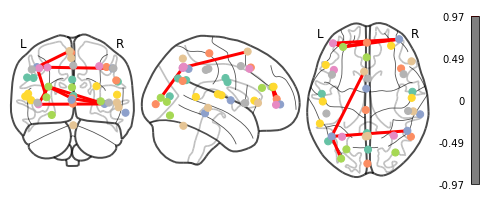

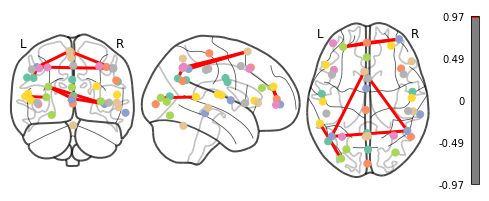

[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...


/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f84c85f84f0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84534d3400>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(10

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.5s, 0.1min
[NiftiMapsMasker.fit_transform] loading regions from /Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f845230ecd0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f84526195b0>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/Users/juliagarciacornet/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nile

/Users/juliagarciacornet/opt/anaconda3/envs/Neuroimatge/lib/python3.9/site-packages/nilearn/maskers/nifti_maps_masker.py:502: UserWarning: Persisting input arguments took 1.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


_______________________________________________filter_and_extract - 3.6s, 0.1min


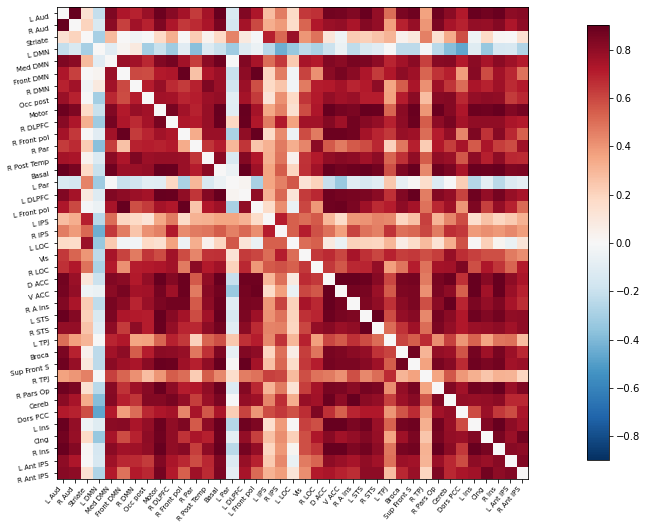

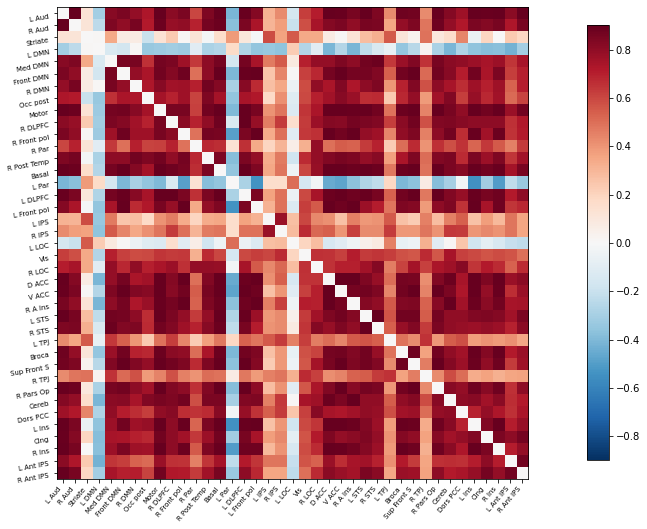

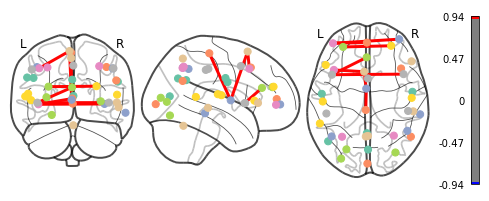

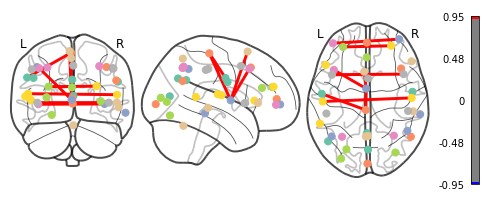

In [56]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-eegNF_bold.nii.gz'
subject_code=[101,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)

# Motor loc

In [ ]:
data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
fild_to_study='_task-motorloc_bold.nii.gz'
subject_code=[101,102,103,104,105,106,107,108,109,110]
events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')

Conn (data_folder,subject_code,events_,fild_to_study)